# Explanation about The Data

We got the data from the site which is https://www.sehatq.com/cari?filter=forum&q=diabetes. We got 50 respondents on the site by doing the copy manually with 4 columns and 50 rows. This data is about consulting between doctor's answers and patient complaints through the website with diabetes keywords. the data was retrieved in the middle of 2022.

# 1. Import Library

In [23]:
import pandas as pd
import numpy as np
import string
import re
import warnings
import matplotlib.pyplot as plt

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

# 2. Import Data

In [2]:
data = pd.read_csv('data diabetes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NAMA DOKTER  50 non-null     object
 1   JUDUL        50 non-null     object
 2   TULISAN      50 non-null     object
 3   LINK         50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


# 3. Filtering (StopWords)

In [3]:
stopwords_obj = StopWordRemoverFactory()
stopwords_sastrawi_ind = stopwords_obj.get_stop_words()
stopwords_nltk = stopwords.words('indonesian')

print(f'Jumlah Stop Words in Sastrawi Library {len(stopwords_sastrawi_ind)}')
print(f'Jumlah Stop Words in NLTK Library {len(stopwords_nltk)}')

set(stopwords_nltk)-set(stopwords_sastrawi_ind)

Jumlah Stop Words in Sastrawi Library 809
Jumlah Stop Words in NLTK Library 758


{'rata', 'tahun', 'tengah', 'tinggi', 'umum', 'waktu'}

In [4]:
stopwords_sastrawi_ind_plus = stopwords_sastrawi_ind + ["sebab","salah","satu",'rata', 'tahun', 'tengah', 'tinggi', 'umum', 'waktu']

idx = 0 
data_copy_1 = data.copy()
for i in data_copy_1["TULISAN"]:
    cleanwords = []
    for t in word_tokenize(str(i).lower()):
        if t not in stopwords_sastrawi_ind_plus:
            cleanwords.append(t)
    
    stc = ""
    for word in cleanwords:
        stc += word + " "
    data_copy_1.iloc[idx,2] = stc
    idx = idx + 1


data_copy_1["TULISAN"]

0     diabetes penyakit dimana gula ditemukan darah ...
1     diabetes penyakit dimana tubuh memproduksi ins...
2     nak memiliki orangtua diabetes , takut terkena...
3     diabetes penyakit tubuh mengontrol gula , seri...
4     impoten sulit mempertahankan ereksi . penderit...
5     diabetes dikenal kencing manis , penyakit meta...
6     tubuh manusia energi aktifitas , energi makana...
7     diabetes melitus ( dm ) penyakit kumpulan geja...
8     diabetes penyakit derita . diabetes mengalami ...
9     diabetes melitus kelompok penyakit metabolik d...
10    diabetes gula darah penyakit kronis dikontrol ...
11    fenomena fajar penderita diabetes disebabkan h...
12    diabetes penyakit kronis gangguan organ pankre...
13    diabetes kondisi gula darah puasa melebihi bat...
14    diabetes kondisi medis berkaitan hormon insuli...
15    penglihatan berbayang kabur nyaman penderitany...
16    diabetes peningkatan gula darah gula darah 200...
17    oats berasal biji gandum kering , mengandu

In [5]:
# stopwords_sastrawi_ind
stopwords_sastrawi_ind_plus
# stopwords.words('indonesian')

['a',
 'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'arti',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'b',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagainamakah',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasannya',
 'bahwasanya',
 'baik',
 'baiklah',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'bera

# 4. Stemming

In [6]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data_copy_2 = data_copy_1.copy()
idx = 0 
for i in data_copy_2["TULISAN"]:
#     data_copy["TULISAN"] = stemmer.stem(data_copy["TULISAN"])
    data_copy_2.iloc[idx,2] = stemmer.stem(str(i))
    
    print(data_copy_2.iloc[idx,2])
    idx = idx + 1
    print()

diabetes sakit mana gula temu darah muncul keluh mudah lapar mudah haus gatal kencing turun berat badan ukur gula darah periksa gula darah periksa gula acak waktu puasa gula darah puasa periksa puasa 8 jam gula darah 2 jam makan hba1c gula sel darah merah rata gula darah 3 periksa istilah diabetes gula darah periksa gula darah perihal keluh kepala kliyengan ringan jatuh tanda gula rendah batas makan ketat kontrol gula makan minum obat atur laku cek gula darah ulang jalan ibadah puasa tunjuk hasil dokter obat diabetes dosis atur pola makan

diabetes sakit mana tubuh produksi insulin sebab tingkat glukosa tubuh tipe diabetes diabetes tipe 1 akibat genetik muncul anak diabetes tipe 2 akibat gaya hidup muncul dewasa gejala diabetes cepat haus lapar buang air malam lemas semut berat badan turun pandang kabur mulut kering dll mendiagnosa sakit periksa hba1c gula darah gula darah puasa tes toleransi glukosa oral deteksi sakit hrs obat obat beri insulin sunti obat anti diabetes metformin glime

# 5. Tokenizing 

In [7]:
seq = 1
dataframess = pd.DataFrame({"Document":[]})
for i in data_copy_2["TULISAN"]:
    stc = re.sub(r"\d+", "", i) #menghapus angka
    stc = stc.translate(str.maketrans('','',string.punctuation)).lower() #menghapus tanda baca
    tokens = word_tokenize(stc) #tokenizing
#     print(tokens)
    kemunculan = FreqDist(tokens)
    data_final = pd.DataFrame(kemunculan.most_common())
    data_final_new = data_final.assign(Document = f'Document {seq}')
    seq = seq + 1
    dataframess = pd.concat([dataframess,data_final_new])
    print(tokens)
    print()
#     print(kemunculan.most_common())
#     print()

['diabetes', 'sakit', 'mana', 'gula', 'temu', 'darah', 'muncul', 'keluh', 'mudah', 'lapar', 'mudah', 'haus', 'gatal', 'kencing', 'turun', 'berat', 'badan', 'ukur', 'gula', 'darah', 'periksa', 'gula', 'darah', 'periksa', 'gula', 'acak', 'waktu', 'puasa', 'gula', 'darah', 'puasa', 'periksa', 'puasa', 'jam', 'gula', 'darah', 'jam', 'makan', 'hbac', 'gula', 'sel', 'darah', 'merah', 'rata', 'gula', 'darah', 'periksa', 'istilah', 'diabetes', 'gula', 'darah', 'periksa', 'gula', 'darah', 'perihal', 'keluh', 'kepala', 'kliyengan', 'ringan', 'jatuh', 'tanda', 'gula', 'rendah', 'batas', 'makan', 'ketat', 'kontrol', 'gula', 'makan', 'minum', 'obat', 'atur', 'laku', 'cek', 'gula', 'darah', 'ulang', 'jalan', 'ibadah', 'puasa', 'tunjuk', 'hasil', 'dokter', 'obat', 'diabetes', 'dosis', 'atur', 'pola', 'makan']

['diabetes', 'sakit', 'mana', 'tubuh', 'produksi', 'insulin', 'sebab', 'tingkat', 'glukosa', 'tubuh', 'tipe', 'diabetes', 'diabetes', 'tipe', 'akibat', 'genetik', 'muncul', 'anak', 'diabetes', 

# 6. Bag Of Words

In [8]:
dataframess.columns = ['Document', 'Word', 'Count']
# dataframess
data_final_summary = pd.pivot_table(dataframess, values='Count', index=['Document'],
                    columns=['Word'])
data_final_summary

Word,abortus,acak,acarbose,adang,agam,air,ajak,akantosis,akar,akibat,...,warna,waspada,wawancara,x,yaa,yang,yogurt,zaitun,zat,zink
Document,,,,,,,,,,,,,,,,,,,,,
Document 1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 11,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 13,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 14,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 15,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Document 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 17,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 7. Filtering keyword

In [9]:
keyword = ["diabetes","sakit","gula","darah","obesitas","insulin","glukosa","obat","glikogen","makan","minum",
           "ginjal","hormon","saraf",
          "manis","melitus","kalori","pankreas", "dm"]
df_key = data_final_summary.loc[:, keyword] 
df_key

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm
Document,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,NaN,NaN,NaN,2.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 10,5.0,5.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,8.0
Document 11,4.0,1.0,8.0,7.0,1.0,NaN,NaN,2.0,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Document 12,1.0,NaN,7.0,7.0,NaN,7.0,1.0,1.0,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Document 13,1.0,1.0,1.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN
Document 14,4.0,1.0,3.0,3.0,NaN,1.0,NaN,3.0,NaN,5.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Document 15,5.0,3.0,6.0,4.0,NaN,4.0,NaN,3.0,NaN,1.0,NaN,NaN,2.0,5.0,NaN,NaN,NaN,1.0,NaN
Document 16,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Document 17,3.0,3.0,10.0,15.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 8. Data Preprocessing (Handling Missing Values)

In [27]:
df_key.fillna(0,inplace=True)
df_key

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm
Document,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 10,5.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,8.0
Document 11,4.0,1.0,8.0,7.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 12,1.0,0.0,7.0,7.0,0.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 13,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Document 14,4.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Document 15,5.0,3.0,6.0,4.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0
Document 16,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Document 17,3.0,3.0,10.0,15.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 9. Elbow Method

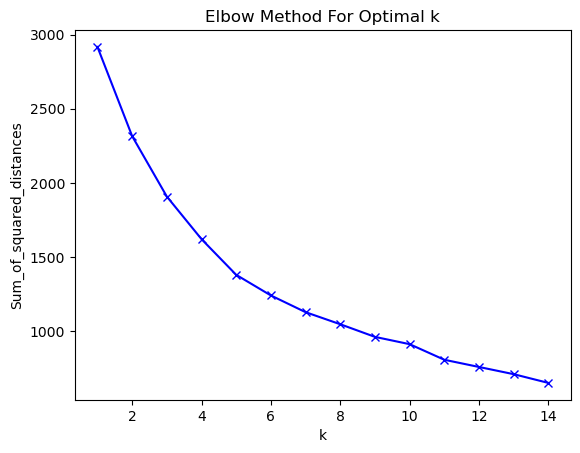

In [33]:
#trying to find the best number of clusters
Sum_of_squared_distances = []
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(df_key)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# 10. Silhouette method

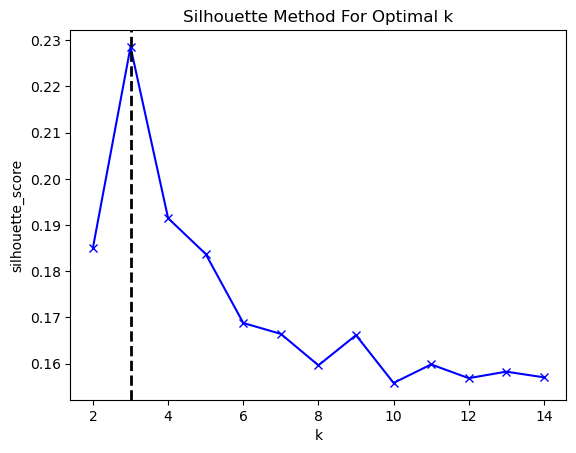

In [38]:
#trying to find the best number of clusters
sil_scr = []
K=range(2,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit_predict(df_key)
    score = silhouette_score(df_key, km.labels_, metric='euclidean')
    sil_scr.append(score)
    
plt.plot(K, sil_scr, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.axvline(x=np.argmax(sil_scr)+2,linewidth=2,color='black',linestyle='--')
plt.show()
# sil_scr

# 11. Dimension Reduction

In [39]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df_key)
data_reduced = pd.DataFrame(data_reduced)
data_reduced

,0,1
0,10.674892,-0.025189
1,-3.637790,1.312754
2,5.107025,-0.546428
3,5.587591,-2.199687
4,-1.697168,-5.349326
5,-0.320376,-1.460241
6,1.848779,0.237622
7,-3.025565,-4.704892
8,12.207231,-0.072019
9,-2.130477,-4.220751


# 12. Clustering K-Means

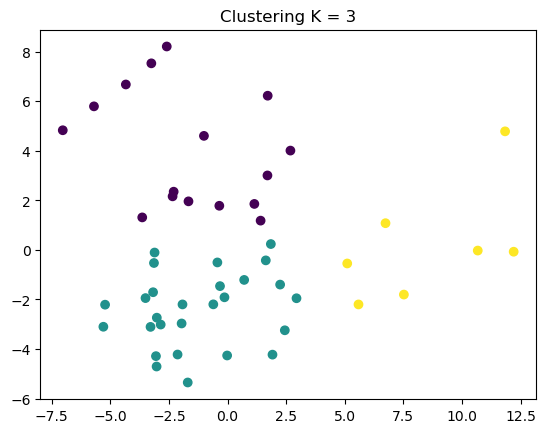

In [45]:
#try with k=3
y_pred_3 = KMeans(n_clusters=3,
               random_state=42).fit_predict(data_reduced)

plt.scatter(data_reduced.iloc[:,0],data_reduced.iloc[:,1],c=y_pred_3)
plt.title("Clustering K = 3")
plt.show()

In [46]:
data_k_3 = pd.DataFrame(df_key).copy()
data_k_3['cluster'] = y_pred_3
data_k_3.index = df_key.index
data_k_3

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm,cluster
Document,,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 10,5.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,8.0,0
Document 11,4.0,1.0,8.0,7.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 12,1.0,0.0,7.0,7.0,0.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 13,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
Document 14,4.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Document 15,5.0,3.0,6.0,4.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1
Document 16,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1
Document 17,3.0,3.0,10.0,15.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


# 13. Result

In [49]:
print(f'Jumlah data seluruhnya adalah {len(data_k_3)}')
print()

#K=3
#Cluster 0
print("Clustering K=3")
print(f'Jumlah dari cluster 0 adalah {len(data_k_3[data_k_3["cluster"]==0])}')
#Cluster 1
print(f'Jumlah dari cluster 1 adalah {len(data_k_3[data_k_3["cluster"]==1])}')
#Cluster 2
print(f'Jumlah dari cluster 2 adalah {len(data_k_3[data_k_3["cluster"]==2])}')
data_k_3

Jumlah data seluruhnya adalah 50

Clustering K=3
Jumlah dari cluster 0 adalah 16
Jumlah dari cluster 1 adalah 27
Jumlah dari cluster 2 adalah 7


Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm,cluster
Document,,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 10,5.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,8.0,0
Document 11,4.0,1.0,8.0,7.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 12,1.0,0.0,7.0,7.0,0.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 13,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
Document 14,4.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Document 15,5.0,3.0,6.0,4.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1
Document 16,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1
Document 17,3.0,3.0,10.0,15.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [52]:
data_k_3[data_k_3["cluster"]==0].sort_values(by="Document")

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm,cluster
Document,,,,,,,,,,,,,,,,,,,,
Document 10,5.0,5.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,8.0,0
Document 19,7.0,0.0,5.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
Document 2,7.0,5.0,3.0,4.0,0.0,2.0,2.0,6.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
Document 20,8.0,3.0,6.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
Document 21,13.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
Document 22,7.0,3.0,4.0,4.0,0.0,1.0,0.0,8.0,0.0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
Document 23,11.0,3.0,7.0,6.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0
Document 29,8.0,2.0,4.0,2.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
Document 3,12.0,2.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [53]:
data_k_3[data_k_3["cluster"]==1].sort_values(by="Document")

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm,cluster
Document,,,,,,,,,,,,,,,,,,,,
Document 13,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
Document 14,4.0,1.0,3.0,3.0,0.0,1.0,0.0,3.0,0.0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Document 15,5.0,3.0,6.0,4.0,0.0,4.0,0.0,3.0,0.0,1.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,1
Document 16,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1
Document 18,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Document 24,3.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
Document 25,3.0,4.0,3.0,3.0,0.0,0.0,0.0,2.0,0.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
Document 26,4.0,2.0,4.0,7.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
Document 28,4.0,3.0,2.0,5.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1


In [54]:
data_k_3[data_k_3["cluster"]==2].sort_values(by="Document")

Word,diabetes,sakit,gula,darah,obesitas,insulin,glukosa,obat,glikogen,makan,minum,ginjal,hormon,saraf,manis,melitus,kalori,pankreas,dm,cluster
Document,,,,,,,,,,,,,,,,,,,,
Document 1,3.0,1.0,13.0,10.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 11,4.0,1.0,8.0,7.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 12,1.0,0.0,7.0,7.0,0.0,7.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 17,3.0,3.0,10.0,15.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 27,5.0,2.0,8.0,10.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Document 41,2.0,0.0,8.0,8.0,0.0,1.0,0.0,7.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2
Document 6,7.0,1.0,12.0,11.0,0.0,4.0,0.0,9.0,0.0,6.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2
